In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.datasets import make_classification

In [2]:
X , y = make_classification(n_samples=1000,n_classes=2,n_features = 20,random_state=27)

In [3]:
X

array([[-0.25820289,  1.0198078 ,  1.52456317, ...,  0.33272104,
        -0.17540696,  1.50112422],
       [-0.45816647,  0.82872793, -0.65696499, ...,  1.2019375 ,
        -0.25583476, -0.19931278],
       [-0.3873777 ,  0.76181785, -1.31035138, ..., -1.0332091 ,
        -1.68667137, -0.76683607],
       ...,
       [-0.54779315, -0.67453913, -0.83464431, ...,  0.57821623,
        -1.17254773,  1.08301901],
       [ 0.5596188 , -0.62502523,  1.40453753, ..., -1.66951495,
        -0.29276041,  0.48456871],
       [-1.42487559,  0.52714552,  0.15786417, ...,  3.25163637,
        -0.54779104, -1.51033252]])

In [4]:
X.shape

(1000, 20)

In [5]:
y.shape

(1000,)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=4)

In [10]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [11]:
KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier(n_neighbors=4)

In [12]:
pred_1 = model1.predict(X_test)
pred_2 = model2.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print("Model1 :",classification_report(y_test,pred_1))

Model1 :               precision    recall  f1-score   support

           0       0.94      0.97      0.95       164
           1       0.96      0.93      0.94       136

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [15]:
print("Model2 :",classification_report(y_test,pred_2))

Model2 :               precision    recall  f1-score   support

           0       0.85      0.93      0.89       164
           1       0.91      0.79      0.85       136

    accuracy                           0.87       300
   macro avg       0.88      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



In [16]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [17]:
pred_prob1.round(2)

array([[0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.37, 0.63],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.67, 0.33],
       [0.13, 0.87],
       [0.03, 0.97],
       [0.12, 0.88],
       [1.  , 0.  ],
       [0.48, 0.52],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.95, 0.05],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.27, 0.73],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.79, 0.21],
       [0.83, 0.17],
       [0.67, 0.33],
       [0.94, 0.06],
       [0.86, 0.14],
       [0.08, 0.92],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.82, 0.18],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.96, 0.04],
       [0.93, 0.07],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.91, 0.09],
       [0.  ,

In [18]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
auc_score_1 = roc_auc_score(y_test,pred_prob1[:,1])
auc_score_2 = roc_auc_score(y_test,pred_prob2[:,1])

In [21]:
auc_score_1

0.9762374461979914

In [22]:
auc_score_2

0.9233769727403157

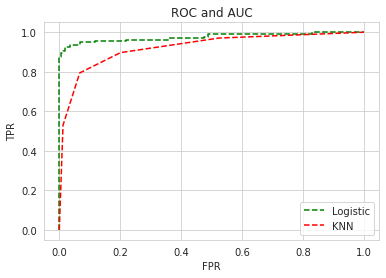

In [23]:
plt.plot(fpr1,tpr1,ls='--',color='green',label="Logistic")
plt.plot(fpr2,tpr2,ls='--',color='red',label='KNN')
plt.title('ROC and AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=0)
plt.show()